In [47]:
#Import Libraries
import pandas as pd
import missingno as msn
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [48]:
#Read data file obtained from datos.gov.co
path = "C:/Users/User/Downloads/ds4a-secopII/" #path Carlos
# path = "C:/Users/VMNR/Desktop/" #path vicman
#path = "../data/" #path GENERAL
file_name = "SECOP_II_-_Contratos_Electr_nicos.csv"

#Select the columns that we want to parse as dates.
date_cols = ['Fecha de Firma', 'Fecha de Inicio del Contrato', 'Fecha de Fin del Contrato', 'Fecha de Inicio de Ejecucion',
             'Fecha de Fin de Ejecucion', 'Ultima Actualizacion', 'Fecha Inicio Liquidacion', 'Fecha Fin Liquidacion',]

df = pd.read_csv(path+file_name, parse_dates=date_cols, low_memory=False)
print('The shape of the original dataset is : ' + str(df.shape))

The shape of the original dataset is : (1715902, 71)


<AxesSubplot:>

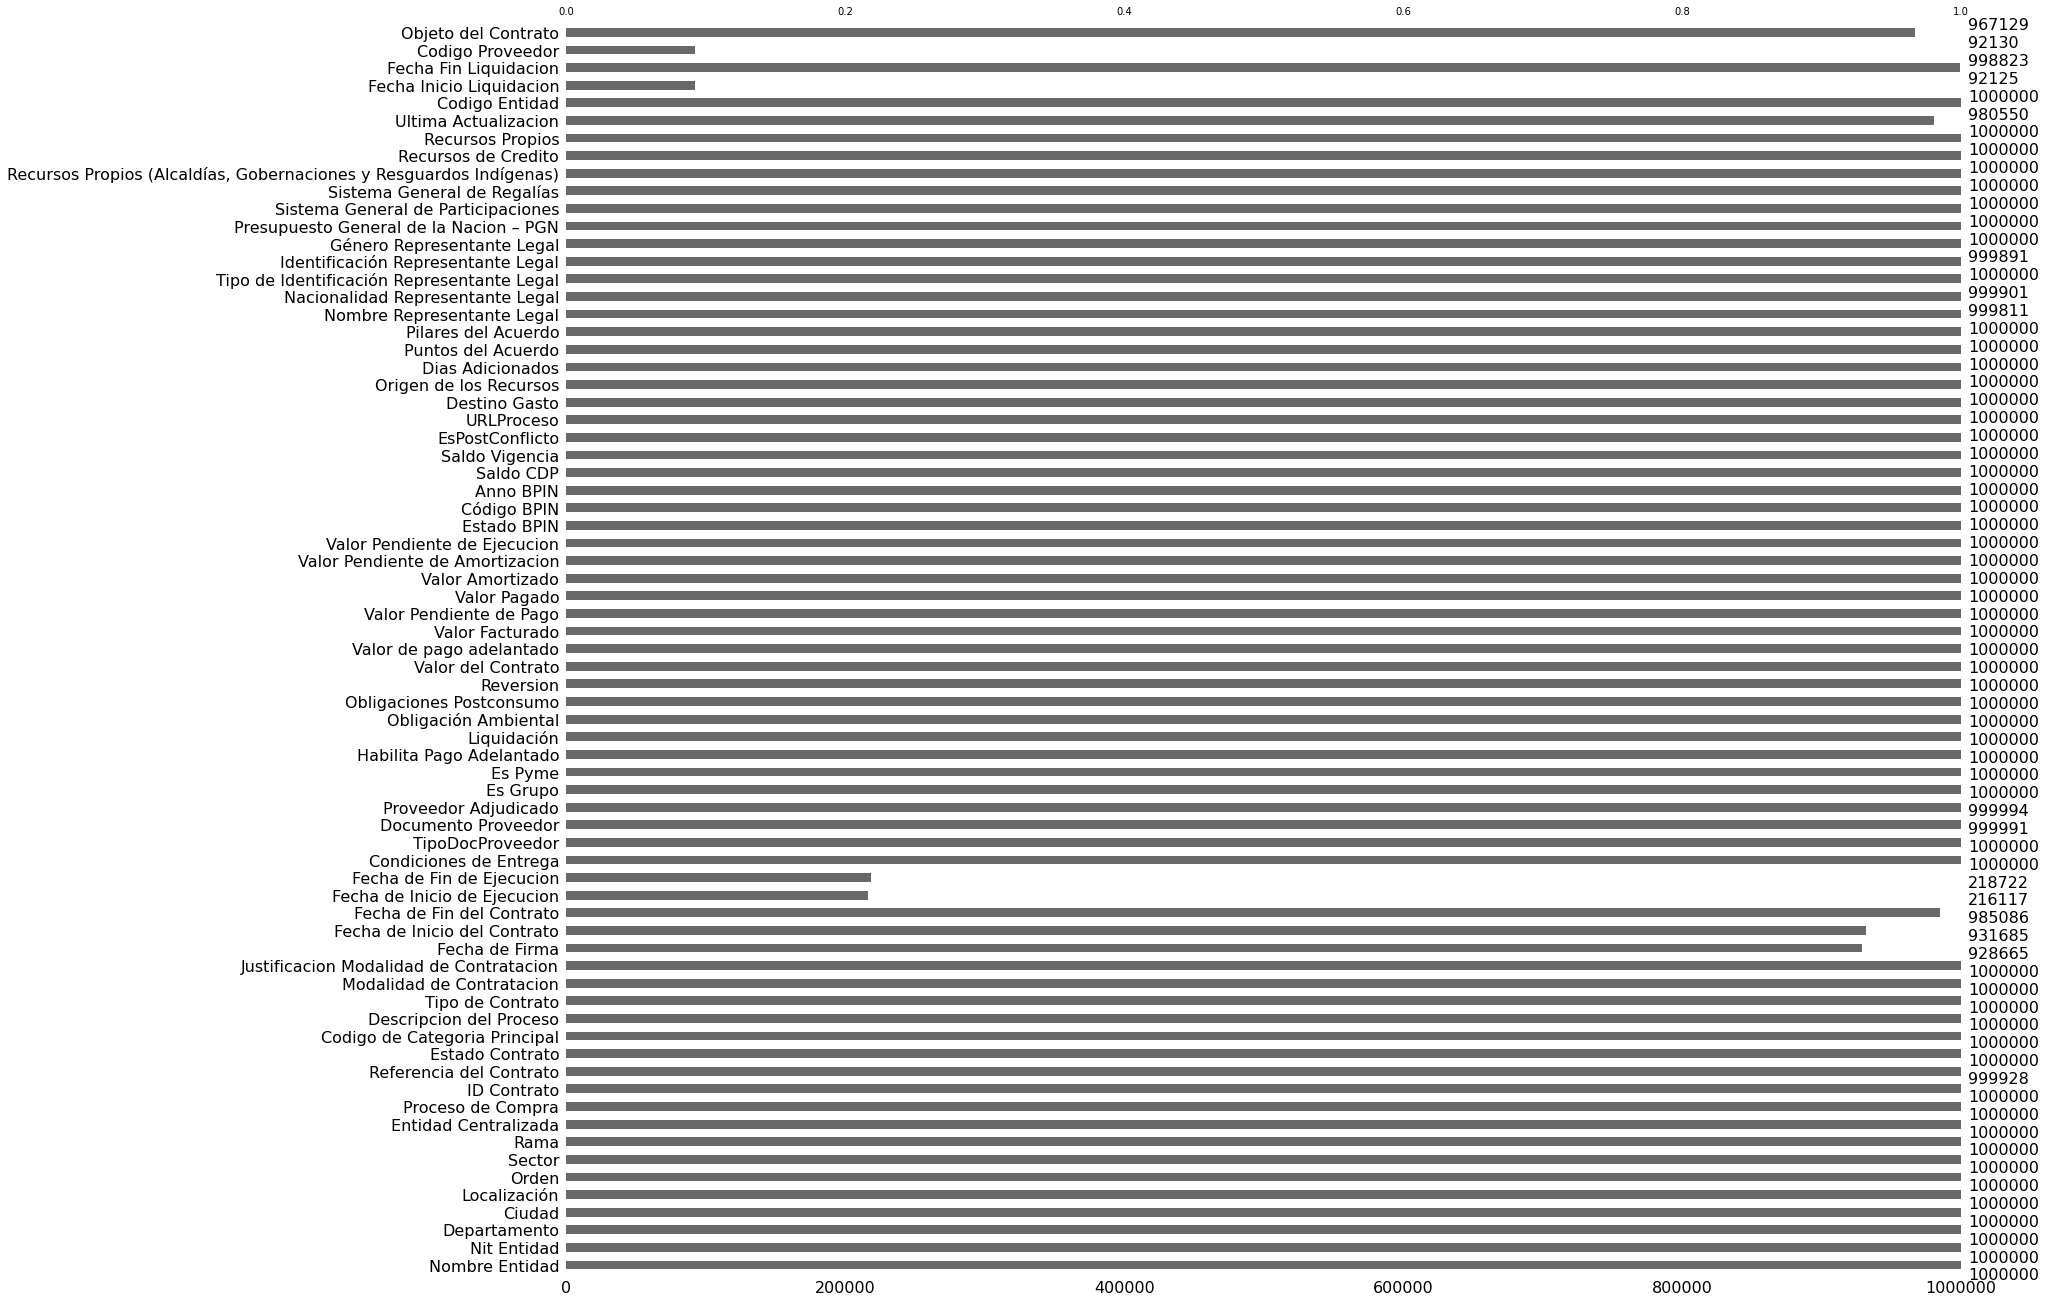

In [84]:
#Check for missing values within the dataset
msn.bar(df.sample(1000000))

In [85]:
len( df[df['Fecha de Firma']==df['Fecha de Inicio de Ejecucion']] )

0

In [50]:
#Select Columns to delete
delete_list = ['Nit Entidad', 'Proceso de Compra', 'Localización', 'Ciudad', 'ID Contrato', 'Referencia del Contrato',
               'Codigo de Categoria Principal', 'Descripcion del Proceso', 'Fecha de Firma', 
               'Justificacion Modalidad de Contratacion', 'Condiciones de Entrega', 'TipoDocProveedor', 
               'Documento Proveedor', 'Proveedor Adjudicado', 'Habilita Pago Adelantado', 'Liquidación',
               'Reversion', 'Estado BPIN', 'Código BPIN', 'Anno BPIN', 'Saldo CDP', 'Saldo Vigencia',
               'URLProceso', 'Puntos del Acuerdo', 'Pilares del Acuerdo', 'Nombre Representante Legal',
               'Nacionalidad Representante Legal','Tipo de Identificación Representante Legal',
               'Género Representante Legal', 'Ultima Actualizacion', 'Codigo Entidad', 'Fecha Inicio Liquidacion',
               'Fecha Fin Liquidacion', 'Codigo Proveedor', 'Objeto del Contrato', 'Identificación Representante Legal']

#Dataset cleaned version 1
df_cleanv1 = df.drop(delete_list, axis=1)

In [51]:
df_cleanv1.shape

(1715902, 35)

In [52]:
#Normalizing 'Departamento' column
dic = {'Distrito Capital de Bogotá':'Bogotá, D.C.', 'Quindío':'Quindio',
       'San Andrés, Providencia y Santa Catalina':'Archipiélago De San Andrés, Providencia Y Santa Catalina'}

df_cleanv1['Departamento'] = df_cleanv1.Departamento.replace(dic)

In [53]:
#Dataset cleaned version 2. Cleaning missing or undefined values in column 'Departamento'
df_cleanv2 = df_cleanv1[(df_cleanv1["Departamento"] != "No Definido") | (df_cleanv1["Dias Adicionados"] != 0)]
df_cleanv2.shape

(1707212, 35)

In [54]:
#Dataset cleaned version 3. Cleaning missing or undefined values in column 'EsPostConflicto'
df_cleanv3 = df_cleanv2[(df_cleanv2['EsPostConflicto']!='ND') | (df_cleanv2["Dias Adicionados"] != 0)]
df_cleanv3.shape

(1705382, 35)

In [55]:
#Dataset cleaned version 4. Cleaning missing or undefined values in column 'Orden'
df_cleanv4 = df_cleanv3[(df_cleanv3['Orden']!='No Definido') | (df_cleanv3["Dias Adicionados"] != 0)]
df_cleanv4.shape

(1705378, 35)

In [56]:
#Dataset cleaned version 5. Cleaning missing or undefined values in column 'Sector'. No deleted rows
df_cleanv5 = df_cleanv4[(df_cleanv4['Sector']!='No Definido') | (df_cleanv4["Dias Adicionados"] != 0)]
df_cleanv5.shape

(1705378, 35)

In [57]:
#Dataset cleaned version 6. Cleaning missing or undefined values in column 'Rama'. No deleted rows
df_cleanv6 = df_cleanv5[(df_cleanv5['Rama']!='No Definido') | (df_cleanv5["Dias Adicionados"] != 0)]
df_cleanv6.shape

(1705378, 35)

In [58]:
#Dataset cleaned version 7. Cleaning missing or undefined values in column 'Tipo de Contrato'.
df_cleanv7 = df_cleanv6[(df_cleanv6['Tipo de Contrato']!='No Especificado') | (df_cleanv6["Dias Adicionados"] != 0)]
df_cleanv7.shape

(1703631, 35)

In [59]:
#Dataset cleaned version 8. Cleaning missing or undefined values in column 'Modalidad de Contratacion'.
df_cleanv8 = df_cleanv7[(df_cleanv7['Modalidad de Contratacion']!="Concurso de méritos con precalificación") | (df_cleanv7["Dias Adicionados"] != 0)]
df_cleanv8.shape

(1703631, 35)

In [60]:
#Dataset cleaned version 8.1 Cleaning missing or undefined values in column 'Modalidad de Contratacion'.
df_cleanv8_1 = df_cleanv8[(df_cleanv8['Destino Gasto']!="No Definido") | (df_cleanv8["Dias Adicionados"] != 0)]
df_cleanv8_1.shape

(1680196, 35)

In [61]:
#Normalizing 'Modalidad de Contratacion' column
dic = {'Enajenación de bienes con sobre cerrado':'Enajenación de bienes', 
        'Enajenación de bienes con subasta':'Enajenación de bienes'}

df_cleanv8_1['Modalidad de Contratacion'] = df_cleanv8_1['Modalidad de Contratacion'].replace(dic)

In [62]:
#Dataset cleaned version 9 and 10. Cleaning Nulls in 'Fecha de Inicio del Contrato' and 'Fecha de Fin del Contrato' columns
df_cleanv9 = df_cleanv8_1[df_cleanv8_1['Fecha de Inicio del Contrato'].isna()==False]
df_cleanv10 = df_cleanv9[df_cleanv9['Fecha de Fin del Contrato'].isna()==False]
df_cleanv10.shape

(1565451, 35)

In [63]:
#Dataset cleaned version 11. Convert 'Fecha de Fin del Contrato' and 'Fecha de Fin de Ejecucion' as date data types
df_cleanv10['Fecha de Fin del Contrato'] = pd.to_datetime(df_cleanv10['Fecha de Fin del Contrato'], errors = 'coerce')
df_cleanv10['Fecha de Fin de Ejecucion'] = pd.to_datetime(df_cleanv10['Fecha de Fin de Ejecucion'], errors = 'coerce')

df_cleanv10['Fecha de Fin del Contrato'] = df_cleanv10['Fecha de Fin del Contrato'].astype('datetime64[ns]')
df_cleanv10['Fecha de Fin de Ejecucion'] = df_cleanv10['Fecha de Fin de Ejecucion'].astype('datetime64[ns]')

In [64]:
#Create new column Origen de los Recursos as multiple binary columns.

variables_a_crear = ['PGN', 'SGP', 'SGR', 'RP_AGR', 'RP_NO_AGR', 'RC']
variables_reales = ['Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                     'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                     'Recursos Propios','Recursos de Credito']
                     
for i,j in zip(variables_a_crear,variables_reales):
    df_cleanv10[i] = (df_cleanv10[j] > 0).astype(int)

In [65]:
#Dataset cleaned version 12. Delete columns previously binarized
delete_list = [ 'Presupuesto General de la Nacion – PGN','Sistema General de Participaciones',
                'Sistema General de Regalías','Recursos Propios (Alcaldías, Gobernaciones y Resguardos Indígenas)',
                'Recursos Propios','Recursos de Credito', 'Origen de los Recursos']

df_cleanv11 = df_cleanv10.drop(delete_list, axis=1)
df_cleanv11.shape

(1565451, 34)

In [66]:
#Construct dependent variable Y 
def feature_engineer(days_added, date_init, date_finish):
    
    contract_duration = abs(date_init - date_finish).days
    
    if contract_duration == 0 and days_added != 0:
        Normalized_Delay = 1
    elif contract_duration == 0 and days_added == 0:
        Normalized_Delay = 0 
    else:
        Normalized_Delay = days_added/contract_duration
    
    if Normalized_Delay == 0:
        delay = 0
    elif Normalized_Delay > 0 and Normalized_Delay < 0.3113636363636363:
        delay = 1
    elif Normalized_Delay >= 0.3113636363636363 and Normalized_Delay < 0.5276645768025077:
        delay = 2
    elif Normalized_Delay >= 0.5276645768025077: 
        delay = 3
            
    return delay

In [67]:
#Construct dependent variable Y 
def feature_engineer2(days_added, date_init, date_finish):
    
    contract_duration = abs(date_init - date_finish).days
    
    if contract_duration == 0 and days_added != 0:
        Normalized_Delay = 1
    elif contract_duration == 0 and days_added == 0:
        Normalized_Delay = 0 
    else:
        Normalized_Delay = days_added/contract_duration
            
    return Normalized_Delay

In [68]:
#Dataset cleaned version 14. Delete one record with NAT in 'Fecha de Fin del Contrato' column
df_cleanv13 = df_cleanv11[df_cleanv11['Fecha de Fin del Contrato'].isna() != True]
df_cleanv13.shape

(1565450, 34)

In [69]:
df_cleanv13['Delay'] = df_cleanv13.apply(lambda x: feature_engineer(x['Dias Adicionados'],
                                                  x['Fecha de Inicio del Contrato'],
                                                  x['Fecha de Fin del Contrato']), axis=1)

In [70]:
df_cleanv13['NormalizedDelay'] = df_cleanv13.apply(lambda x: feature_engineer2(x['Dias Adicionados'],
                                                  x['Fecha de Inicio del Contrato'],
                                                  x['Fecha de Fin del Contrato']), axis=1)

<AxesSubplot:>

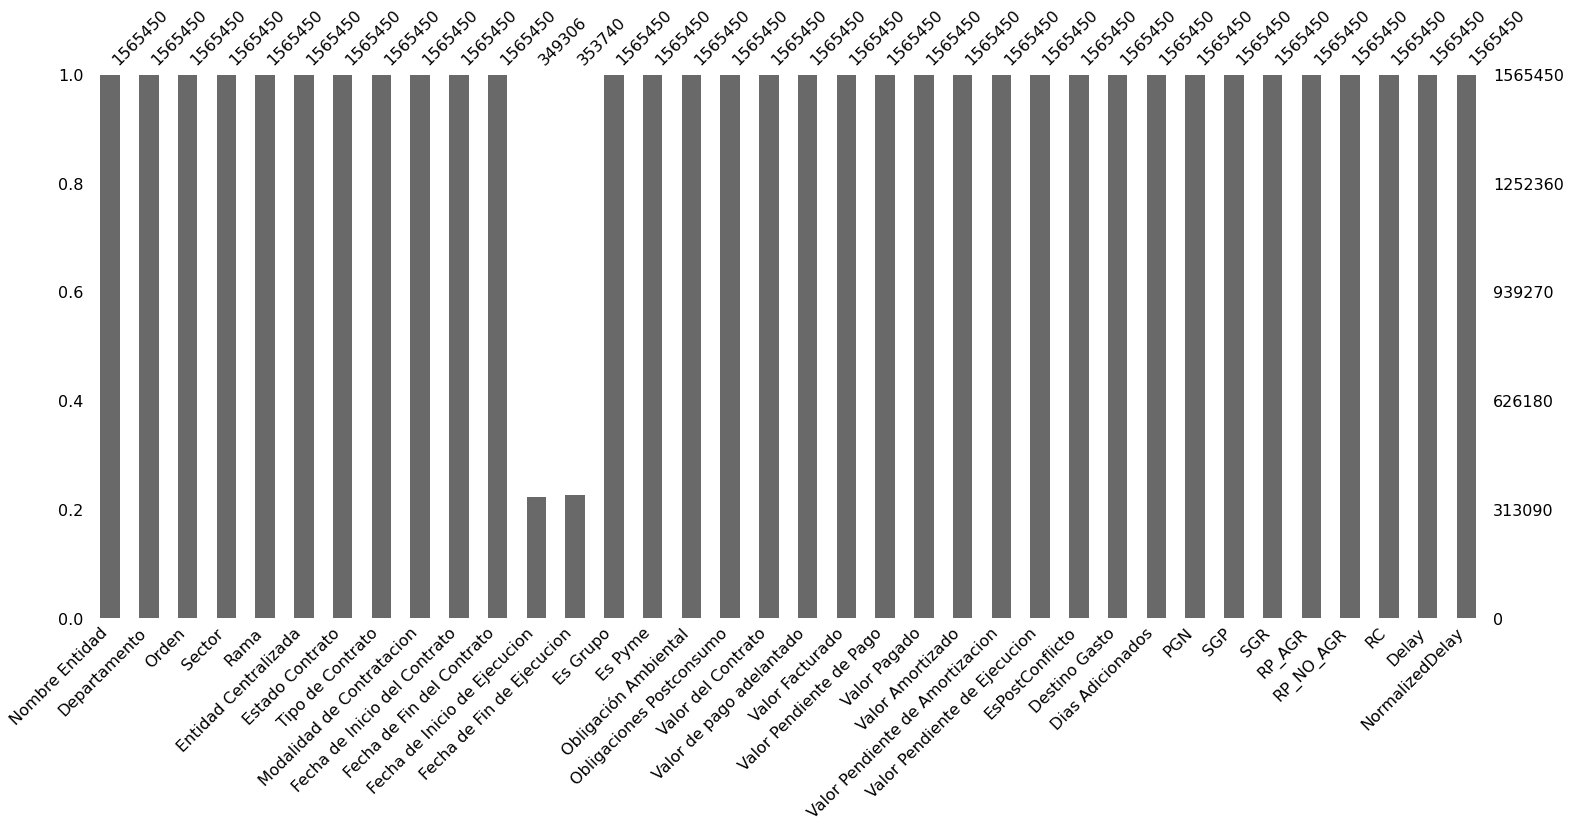

In [71]:
#Check for missing values within the dataset
msn.bar(df_cleanv13)

**Findings:**

1. There are 366400 rows in column 'Fecha de Inicio de Ejecucion' with valid dates (no NAT)
2. There are 370887 rows in column 'Fecha de Fin de Ejecucion' with valid dates (no NAT)

In [72]:
#Projects with same date in 'Fecha de Inicio del Contrato' and 'Fecha de Inicio de Ejecucion' columns
df_cleanv13[df_cleanv13['Fecha de Inicio del Contrato'] == df_cleanv13['Fecha de Inicio de Ejecucion']].shape

(297102, 36)

In [73]:
#Projects with same date in 'Fecha de Fin del Contrato' and 'Fecha de Fin de Ejecucion' columns
df_cleanv13[df_cleanv13['Fecha de Fin del Contrato'] == df_cleanv13['Fecha de Fin de Ejecucion']].shape

(295775, 36)

In [74]:
#Results in the two previous cells indicates that those dates are very similar most of the cases, so it is valid 
#to delete 'Fecha de Inicio de Ejecucion' and 'Fecha de Fin de Ejecucion' columns from dataframe
df_cleanv14 = df_cleanv13.drop(['Fecha de Inicio de Ejecucion', 'Fecha de Fin de Ejecucion'], axis=1)
df_cleanv14.shape

(1565450, 34)

In [75]:
df_cleanv14.iloc[:,15:23].head(1)

,Valor del Contrato,Valor de pago adelantado,Valor Facturado,Valor Pendiente de Pago,Valor Pagado,Valor Amortizado,Valor Pendiente de Amortizacion,Valor Pendiente de Ejecucion
0,18160000,0,9080000,18160000,0,0,0,18160000


<AxesSubplot:>

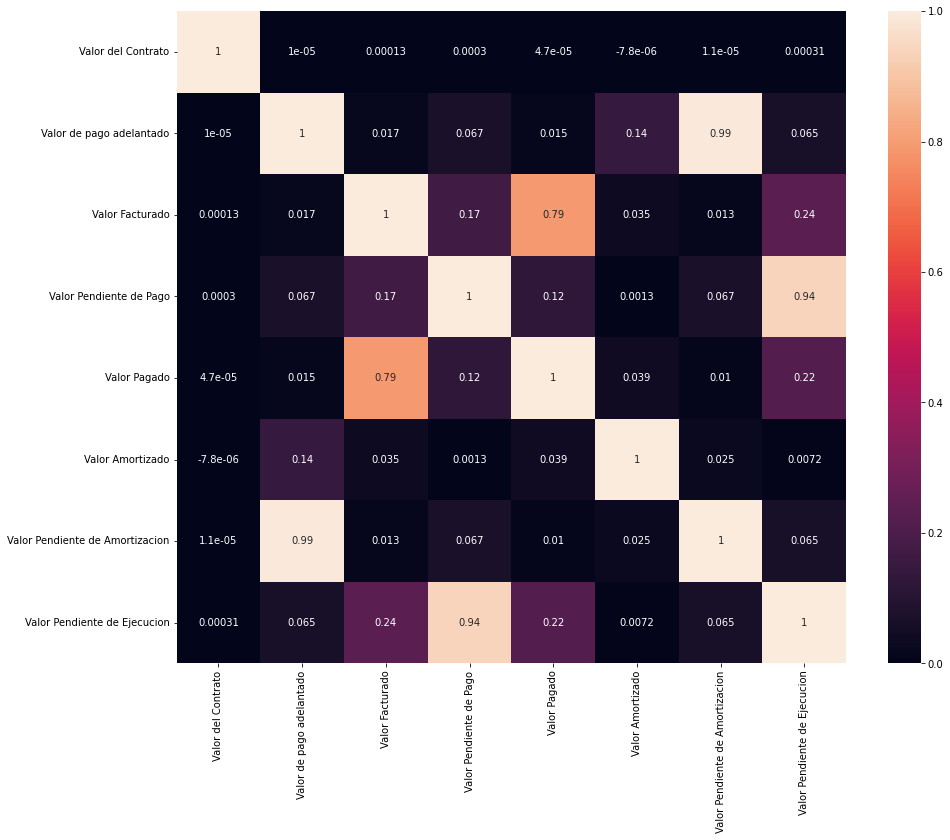

In [76]:
corr = (df_cleanv14.iloc[:,15:23]).corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

There is high correlation between 3 pairs of variables, the decision is to eliminate 1 variable of each pair to avoid redundancy of information in the model since it can generate multicollinearity problems.

In [77]:
df_cleanv15 = df_cleanv14.drop(['Valor Pagado','Valor Pendiente de Amortizacion', 'Valor Pendiente de Ejecucion'], axis=1)

<AxesSubplot:>

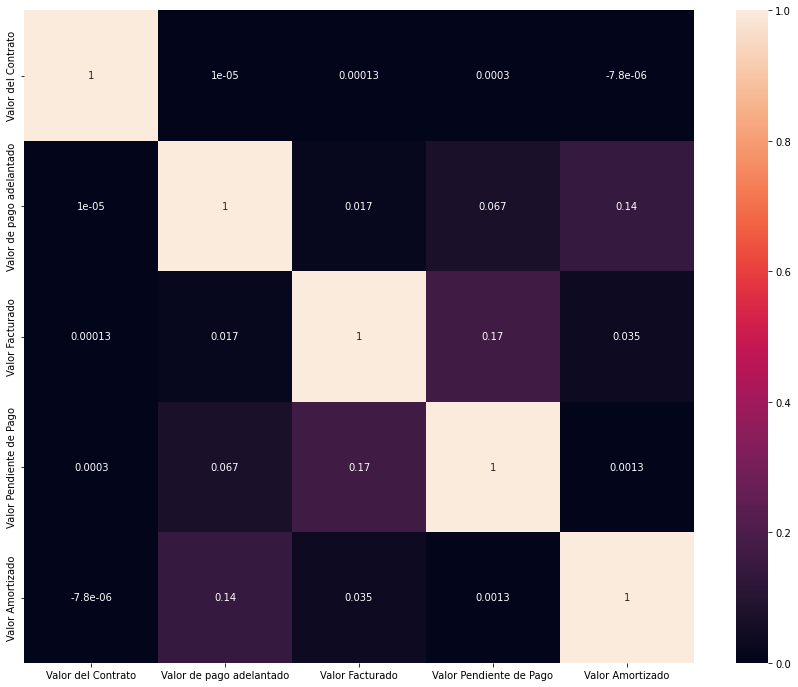

In [78]:
corr = (df_cleanv15.loc[:,['Valor del Contrato', 'Valor de pago adelantado',
                            'Valor Facturado','Valor Pendiente de Pago', 'Valor Amortizado']]).corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corr, annot=True)

There is no correlation problems in numerical variables.

In [79]:
#Convert the variables to its corresponding data type
cat_cols = ['Departamento', 'Orden', 'Sector', 'Rama','Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato', 'Modalidad de Contratacion',
            'Es Grupo','Es Pyme', 'Destino Gasto', 'EsPostConflicto','Obligaciones Postconsumo','Obligación Ambiental', 'Delay']
cat_values = {key:'category' for key in cat_cols}
df_cleanv16 = df_cleanv15.astype(cat_values)

df_cleanv16.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1565450 entries, 0 to 1715901
Data columns (total 31 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   Nombre Entidad                1565450 non-null  object        
 1   Departamento                  1565450 non-null  category      
 2   Orden                         1565450 non-null  category      
 3   Sector                        1565450 non-null  category      
 4   Rama                          1565450 non-null  category      
 5   Entidad Centralizada          1565450 non-null  category      
 6   Estado Contrato               1565450 non-null  category      
 7   Tipo de Contrato              1565450 non-null  category      
 8   Modalidad de Contratacion     1565450 non-null  category      
 9   Fecha de Inicio del Contrato  1565450 non-null  datetime64[ns]
 10  Fecha de Fin del Contrato     1565450 non-null  datetime64[ns]
 11

In [80]:
print('The shape of the cleaned dataset is : ' + str(df_cleanv16.shape))

The shape of the cleaned dataset is : (1565450, 31)


In [81]:
df_cleanv16.columns

Index(['Nombre Entidad', 'Departamento', 'Orden', 'Sector', 'Rama',
       'Entidad Centralizada', 'Estado Contrato', 'Tipo de Contrato',
       'Modalidad de Contratacion', 'Fecha de Inicio del Contrato',
       'Fecha de Fin del Contrato', 'Es Grupo', 'Es Pyme',
       'Obligación Ambiental', 'Obligaciones Postconsumo',
       'Valor del Contrato', 'Valor de pago adelantado', 'Valor Facturado',
       'Valor Pendiente de Pago', 'Valor Amortizado', 'EsPostConflicto',
       'Destino Gasto', 'Dias Adicionados', 'PGN', 'SGP', 'SGR', 'RP_AGR',
       'RP_NO_AGR', 'RC', 'Delay', 'NormalizedDelay'],
      dtype='object')

In [83]:
# Export the cleaned dataset to a csv file
df_cleanv16.to_csv(path + 'SECOP_Electronicos_Cleaned.csv')